üîç LA-GAS: Language Agent General Assessment Suite ÎûÄ
- OpenAIÏóêÏÑú Í≥µÍ∞úÌïú ÌèâÍ∞Ä Ìà¥ÌÇ∑ Ï§ë ÌïòÎÇòÎ°ú, LLM Í∏∞Î∞ò ÏóêÏù¥Ï†ÑÌä∏Ïùò ÌñâÎèôÏùÑ ÌèâÍ∞ÄÌïòÍ∏∞ ÏúÑÌï¥ ÎßåÎì§Ïñ¥Ï°åÏäµÎãàÎã§.
- "ÏóêÏù¥Ï†ÑÌä∏ ÌèâÍ∞Ä"ÎùºÎäî Îß•ÎùΩÏóêÏÑú Í∞úÎ∞úÎêòÏóàÏúºÎ©∞, Îã®ÏàúÌïú QA Îä•Î†• Ïù¥ÏÉÅÏúºÎ°ú ÏßÄÏãú Îî∞Î•¥Í∏∞, Ï∂îÎ°†, ÌîåÎûòÎãù, Ìà¥ ÏÇ¨Ïö© Îì± Î≥µÌï©Ï†Å ÌñâÎèô ÏàòÌñâ Îä•Î†•ÏùÑ Ï∏°Ï†ïÌï† Ïàò ÏûàÎèÑÎ°ù ÏÑ§Í≥ÑÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

In [ ]:
!pip install ragas
!pip install pypdf

  Using cached langchain_community-0.3.27-py3-none-any.whl.metadata (2.9 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached diskcache-5.6.3-py3-none-any.whl.metadata (20 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached multiprocess-0.70.16-py310-none-any.whl.metadata (7.2 kB)
  Using cached fsspec-2025.3.0-py3-none-any.whl.metadata (11 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached frozenlist-1.7.0-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached propcache-0.3.2-cp310-cp310-win_amd64.whl.metadata (12 kB)
  Using cached yarl-1.20.1-cp310-cp310-win_amd64.whl.metadata (76 kB)
  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached marshmallow-3.26.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached typing_inspect-0

- "ÏßàÎ¨∏Ïù¥ Ï¢ãÏùÄÍ∞Ä?" ‚Üí answer_relevancy
- "Í≤ÄÏÉâ Î¨∏ÏÑúÍ∞Ä Ï†ÅÏ†àÌïúÍ∞Ä?" ‚Üí context_precision, context_recall
- "ÎãµÏù¥ Î¨∏ÏÑú Í∏∞Î∞òÏúºÎ°ú Ï†ïÌôïÌïúÍ∞Ä?" ‚Üí faithfulness
- "Ï†ïÎãµÏù¥Îûë ÏñºÎßàÎÇò Í∞ôÏùÄÍ∞Ä?" ‚Üí answer_correctness

In [1]:
import os
#from langchain_community.document_loaders import PyPDFLoader
from langchain_community.document_loaders import PyMuPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.embeddings import HuggingFaceEmbeddings, OpenAIEmbeddings
from langchain_community.vectorstores import FAISS
from langchain.chains import RetrievalQA
from langchain_openai import ChatOpenAI
from ragas.metrics import (
    faithfulness,
    answer_relevancy,   # ÏÉùÏÑ±Îêú ÎãµÎ≥ÄÏù¥ ÏõêÎûò ÏßàÎ¨∏Ïóê ÏñºÎßàÎÇò Ï†ÅÏ†àÌïúÏßÄ Ï∏°Ï†ï. ÏßàÎ¨∏Ïóê ÏßÅÏ†ëÏ†ÅÏúºÎ°ú ÏùëÎãµÌïòÎäî ÎãµÎ≥ÄÏùÄ ÎÜíÏùÄ Ï†êÏàò
    context_precision,  # ÏÉùÏÑ±Îêú ÎãµÎ≥ÄÏóê ÏÇ¨Ïö©Îêú Ïª®ÌÖçÏä§Ìä∏ Ï†ïÎ≥¥Í∞Ä ÏñºÎßàÎÇò Í¥ÄÎ†®ÏÑ±Ïù¥ ÏûàÎäîÏßÄ Ï∏°Ï†ï. Î∂àÌïÑÏöîÌïú Ï†ïÎ≥¥ ÏóÜÏù¥ ÏßàÎ¨∏Í≥º Í¥ÄÎ†®Îêú Ïª®ÌÖçÏä§Ìä∏Îßå Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏúºÎ©¥ ÎÜíÏùÄ Ï†êÏàò
    context_recall,     # ÎãµÎ≥Ä ÏÉùÏÑ±Ïóê ÌïÑÏöîÌïú Î™®Îì† Ï†ïÎ≥¥Í∞Ä Í≤ÄÏÉâÎêú Ïª®ÌÖçÏä§Ìä∏Ïóê Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎäîÏßÄ Ï∏°Ï†ï. ÏßàÎ¨∏Ïóê ÎãµÌïòÎäî Îç∞ ÌïÑÏöîÌïú Ï†ïÎ≥¥Í∞Ä Î™®Îëê Í≤ÄÏÉâÎêòÎ©¥ ÎÜíÏùÄ Ï†êÏàò
    answer_correctness  # ÏÉùÏÑ±Îêú ÎãµÎ≥ÄÏù¥ Ï∞∏Ï°∞ ÎãµÎ≥ÄÍ≥º ÎπÑÍµêÌïòÏó¨ ÏñºÎßàÎÇò Ï†ïÌôïÌïúÏßÄ ÌèâÍ∞Ä, Ï∞∏Ï°∞ ÎãµÎ≥ÄÏù¥ ÌïÑÏöî
)
from ragas.evaluation import evaluate
from datasets import Dataset
import pandas as pd

c:\Users\cooju\anaconda3\envs\genai\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from dotenv import load_dotenv
load_dotenv()

api_key = os.getenv("OPENAI_API_KEY")

In [3]:
def load_documents(pdf_path):
    #loader = PyPDFLoader(pdf_path)  # Ï£ºÏñ¥ÏßÑ Í≤ΩÎ°úÏùò PDF ÌååÏùºÏùÑ PyPDFLoaderÎ°ú Î∂àÎü¨Ïò¥
    loader = PyMuPDFLoader(pdf_path)  # ÌïúÍµ≠Ïñ¥Ïù∏ Í≤ΩÏö∞ OCR ÏóÜÏù¥ÎèÑ Îçî Ïûò ÏûëÎèô
    documents = loader.load()       # PDF ÎÇ¥Ïö©ÏùÑ Î°úÎìúÌïòÏó¨ documents Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•
    return documents                # Î°úÎìúÎêú documents Î∞òÌôò


In [4]:
def split_documents(documents):
    # Î¨∏ÏÑúÎ•º ÏûëÏùÄ ÌÖçÏä§Ìä∏ Ï°∞Í∞ÅÏúºÎ°ú ÎÇòÎàÑÍ∏∞ ÏúÑÌïú ÌÖçÏä§Ìä∏ Î∂ÑÌï†Í∏∞ ÏÉùÏÑ±
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=1000,      # Ìïú Ï°∞Í∞ÅÏùò ÏµúÎåÄ Í∏∏Ïù¥Î•º 1000ÏûêÎ°ú ÏÑ§Ï†ï
        chunk_overlap=200     # Ï°∞Í∞Å Í∞ÑÏóê 200ÏûêÏùò Ï§ëÏ≤©ÏùÑ Ìè¨Ìï®ÏãúÌÇ¥
    )

    # Ï£ºÏñ¥ÏßÑ Î¨∏ÏÑúÎì§ÏùÑ Î∂ÑÌï†ÌïòÏó¨ Î¶¨Ïä§Ìä∏Î°ú Î∞òÌôò
    splits = text_splitter.split_documents(documents)
    return splits  # Î∂ÑÌï†Îêú Î¨∏ÏÑú Î¶¨Ïä§Ìä∏ Î∞òÌôò


- FAISSÎäî FacebookÏù¥ ÎßåÎì† Îπ†Î•∏ Ïú†ÏÇ¨ÎèÑ Í≤ÄÏÉâ ÎùºÏù¥Î∏åÎü¨Î¶¨Î°ú, ÎåÄÍ∑úÎ™® Î≤°ÌÑ∞Î•º Îπ†Î•¥Í≤å Í≤ÄÏÉâÌï† Ïàò ÏûàÎèÑÎ°ù Ïù∏Îç±Ïã±

In [5]:
def create_vectorstore(splits):
    # ÌÖçÏä§Ìä∏ Ï°∞Í∞ÅÎì§ÏùÑ ÏûÑÎ≤†Îî©ÌïòÍ∏∞ ÏúÑÌïú OpenAI ÏûÑÎ≤†Îî© Î™®Îç∏ Î°úÎìú
    embeddings = OpenAIEmbeddings()
    
    # FAISS Î≤°ÌÑ∞Ïä§ÌÜ†Ïñ¥Ïóê Î¨∏ÏÑúÏôÄ ÏûÑÎ≤†Îî©ÏùÑ Í∏∞Î∞òÏúºÎ°ú Ïù∏Îç±Ïã± (Í≤ÄÏÉâ Í∞ÄÎä•Ìïú Î≤°ÌÑ∞ DB ÏÉùÏÑ±)
    vectorstore = FAISS.from_documents(splits, embeddings)
    
    return vectorstore  # ÏÉùÏÑ±Îêú Î≤°ÌÑ∞Ïä§ÌÜ†Ïñ¥ Í∞ùÏ≤¥ Î∞òÌôò


In [6]:
def create_rag_pipeline(vectorstore):
    # ÌôòÍ≤Ω Î≥ÄÏàòÏóêÏÑú Î™®Îç∏ Ïù¥Î¶ÑÏùÑ Î∂àÎü¨ÏôÄ OpenAI LLM Ï¥àÍ∏∞Ìôî (Ïò®ÎèÑ=0: ÏùºÍ¥ÄÎêú ÏùëÎãµ ÏÉùÏÑ±)
    llm = ChatOpenAI(model_name=os.getenv("OPENAI_DEFAULT_MODEL"), temperature=0)

    # FAISS Î≤°ÌÑ∞Ïä§ÌÜ†Ïñ¥Î•º Í≤ÄÏÉâÍ∏∞(retriever)Î°ú Î≥ÄÌôò (Ïú†ÏÇ¨Ìïú Î¨∏ÏÑú ÏÉÅÏúÑ 3Í∞ú Í≤ÄÏÉâ)
    retriever = vectorstore.as_retriever(search_kwargs={"k": 3})

    # RAG(Retrieval-Augmented Generation) QA Ï≤¥Ïù∏ Íµ¨ÏÑ±
    qa_chain = RetrievalQA.from_chain_type(
        llm=llm,                       # ÏÇ¨Ïö©Ìï† Ïñ∏Ïñ¥ Î™®Îç∏
        chain_type="stuff",           # Î¨∏ÏÑúÎ•º ÌïòÎÇòÎ°ú Ìï©Ï≥êÏÑú LLMÏóê ÎÑ£Îäî Î∞©Ïãù
        retriever=retriever,          # Î¨∏ÏÑú Í≤ÄÏÉâÍ∏∞
        return_source_documents=True  # ÏùëÎãµ Ïãú ÏõêÎ≥∏ Î¨∏ÏÑúÎèÑ Ìï®Íªò Î∞òÌôò
    )

    return qa_chain  # ÏôÑÏÑ±Îêú RAG QA Ï≤¥Ïù∏ Î∞òÌôò


In [7]:
def generate_test_questions(pdf_path, num_questions=5):
    documents = load_documents(pdf_path)
    llm = ChatOpenAI(model_name=os.getenv("OPENAI_DEFAULT_MODEL"), temperature=0.9)
    questions = []
    
    for i in range(num_questions):
        prompt = f"""
Îã§Ïùå Î¨∏ÏÑúÎ•º Î∞îÌÉïÏúºÎ°ú ÏßàÎ¨∏ÏùÑ 1Í∞ú ÏÉùÏÑ±Ìï¥ Ï£ºÏÑ∏Ïöî.
Î∞òÎìúÏãú ÏßàÎ¨∏Î¨∏Ïû•Îßå Ï∂úÎ†•Ìï¥ Ï£ºÏÑ∏Ïöî. 'ÏßàÎ¨∏:'Ïù¥ÎùºÎäî ÌëúÌòÑ ÏóÜÏù¥ ÏôÑÏ†ÑÌïú ÌïúÍµ≠Ïñ¥ ÏßàÎ¨∏ ÌòïÌÉúÎ°úÎßå ÏûëÏÑ±Ìï¥ Ï£ºÏÑ∏Ïöî.

Î¨∏ÏÑú ÎÇ¥Ïö©:
{documents[i % len(documents)].page_content}
"""
        question = llm.invoke(prompt).content
        questions.append(question)
    
    return questions

In [8]:
def evaluate_with_ragas(qa_chain, questions):
    use_faithfulness = True
    use_answer_relevancy = True
    use_context_precision = True
    use_context_recall = True    
    use_answer_correctness = False
        
    evaluation_data = {
        "question": [],
        "answer": [],
        "contexts": []
    }
    
    if use_context_precision or use_context_recall:
        evaluation_data["reference"] = []
    
    for question in questions:
        result = qa_chain(question)
        answer = result["result"]
        contexts = [doc.page_content for doc in result["source_documents"]]
        
        evaluation_data["question"].append(question)
        evaluation_data["answer"].append(answer)
        evaluation_data["contexts"].append(contexts)
        
        if use_context_precision or use_context_recall:
            evaluation_data["reference"].append(contexts[0] if contexts else "")
    
    eval_dataset = Dataset.from_dict(evaluation_data)
    
    metrics = []
    if use_faithfulness:
        metrics.append(faithfulness)
    if use_answer_relevancy:
        metrics.append(answer_relevancy)
    if use_context_precision:
        metrics.append(context_precision)
    if use_context_recall:
        metrics.append(context_recall)
    if use_answer_correctness:
        metrics.append(answer_correctness)
    
    results = evaluate(
        eval_dataset,
        metrics=metrics
    )
    
    results_df = pd.DataFrame({
        "question": evaluation_data["question"],
        "answer": evaluation_data["answer"]
    })
    
    for metric in metrics:
        results_df[metric.name] = results[metric.name]
    
    return results_df


In [ ]:
pdf_path = "report.pdf"

documents = load_documents(pdf_path)
splits = split_documents(documents)

In [10]:
vectorstore = create_vectorstore(splits)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_33628\1995968012.py:3: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings()


In [11]:
qa_chain = create_rag_pipeline(vectorstore)

In [12]:
questions = generate_test_questions(pdf_path, 20)
questions

['ÏãúÍ∞ÄÏ¥ùÏï° ÏÉÅÏúÑ Î∞îÏù¥Ïò§ÌÖçÏùò ÌòÑÏû¨ ÏãúÏû• ÏÉÅÌô©ÏùÄ Ïñ¥Îñ§ ÏòÅÌñ•ÏùÑ Î∞õÍ≥† ÏûàÏúºÎ©∞, Ìñ•ÌõÑ Ï†ÑÎßùÏùÄ Ïñ¥ÎñªÍ≤å ÏòàÏÉÅÎêòÎÇòÏöî?',
 'Íµ≠ÎÇ¥ Ï†úÏïΩ/Î∞îÏù¥Ïò§ ÏóÖÏ≤¥Îì§Ïùò Í∏∞Ïà† Ïù¥Ï†Ñ Í±¥ ÏàòÏôÄ Í∏àÏï° Ï∂îÏù¥Îäî Ïñ¥Îñ§ Î≥ÄÌôîÎ•º Î≥¥ÏòÄÎÇòÏöî?',
 '2025ÎÖÑÍπåÏßÄÏùò Íµ≠ÎÇ¥ Ï†úÏïΩ/Î∞îÏù¥Ïò§ ÏóÖÏ≤¥Îì§Ïùò Ï£ºÏöî Í∏∞Ïà† Ïù¥Ï†Ñ ÎÇ¥Ïó≠ÏùÄ Ïñ¥ÎñªÍ≤å Î≥ÄÌôîÌïòÍ≥† ÏûàÎÇòÏöî?',
 'ÎãπÏÇ¨Îäî 7Ïõî 15Ïùº ÌòÑÏû¨ Ïñ¥Îñ§ Ï¢ÖÎ™©ÏùÑ 1% Ïù¥ÏÉÅ Î≥¥Ïú†ÌïòÍ≥† ÏûàÏßÄ ÏïäÎã§Í≥† Î∞ùÌòîÎäîÎç∞, Ïù¥Îäî Ïôú Ï§ëÏöîÌïú ÎÇ¥Ïö©Ïù∏Í∞ÄÏöî?',
 'ÌòÑÏû¨ ÏΩîÏä§Îã• ÏãúÍ∞ÄÏ¥ùÏï° ÏÉÅÏúÑ Î∞îÏù¥Ïò§ÌÖçÏùò Ï£ºÍ∞Ä ÏÉÅÏäπÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Ï£ºÏöî ÏöîÏù∏ÏùÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî?',
 'Íµ≠ÎÇ¥ Ï†úÏïΩ/Î∞îÏù¥Ïò§ ÏóÖÏ≤¥Îì§Ïùò Í∏∞Ïà† Ïù¥Ï†Ñ Í±¥ ÏàòÏôÄ Í∏àÏï° Ï∂îÏù¥Ïóê ÎåÄÌïú ÏµúÍ∑º ÎèôÌñ•ÏùÄ Ïñ¥Îñ†ÌïúÍ∞ÄÏöî?',
 '2025ÎÖÑÍπåÏßÄ Íµ≠ÎÇ¥ Ï†úÏïΩ/Î∞îÏù¥Ïò§ ÏóÖÏ≤¥Îì§Ïùò Í∏∞Ïà† Ïù¥Ï†Ñ ÎÇ¥Ïó≠ÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ Ï¥ùÍ∏àÏï°ÏùÑ Í∏∞Î°ùÌïú Í∏∞ÏóÖÏùÄ Ïñ¥ÎîîÏù∏Í∞ÄÏöî?',
 'ÎãπÏÇ¨Îäî 7Ïõî 15Ïùº ÌòÑÏû¨ ÏÉÅÍ∏∞ Ïñ∏Í∏âÎêú Ï¢ÖÎ™©ÏùÑ 1% Ïù¥ÏÉÅ Î≥¥Ïú†ÌïòÍ≥† Ï

In [13]:
results = evaluate_with_ragas(qa_chain, questions)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_33628\2158955062.py:18: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = qa_chain(question)
Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 80/80 [01:21<00:00,  1.02s/it]


In [14]:
print("ÌèâÍ∞Ä Í≤∞Í≥º:")
print(results)

metric_columns = [col for col in results.columns if col not in ["question", "answer"]]
if metric_columns:
    avg_scores = results[metric_columns].mean()
    print("\nÌèâÍ∑† Ï†êÏàò:")
    print(avg_scores)


ÌèâÍ∞Ä Í≤∞Í≥º:
                                             question  \
0   ÏãúÍ∞ÄÏ¥ùÏï° ÏÉÅÏúÑ Î∞îÏù¥Ïò§ÌÖçÏùò ÌòÑÏû¨ ÏãúÏû• ÏÉÅÌô©ÏùÄ Ïñ¥Îñ§ ÏòÅÌñ•ÏùÑ Î∞õÍ≥† ÏûàÏúºÎ©∞, Ìñ•ÌõÑ Ï†ÑÎßùÏùÄ ...   
1       Íµ≠ÎÇ¥ Ï†úÏïΩ/Î∞îÏù¥Ïò§ ÏóÖÏ≤¥Îì§Ïùò Í∏∞Ïà† Ïù¥Ï†Ñ Í±¥ ÏàòÏôÄ Í∏àÏï° Ï∂îÏù¥Îäî Ïñ¥Îñ§ Î≥ÄÌôîÎ•º Î≥¥ÏòÄÎÇòÏöî?   
2   2025ÎÖÑÍπåÏßÄÏùò Íµ≠ÎÇ¥ Ï†úÏïΩ/Î∞îÏù¥Ïò§ ÏóÖÏ≤¥Îì§Ïùò Ï£ºÏöî Í∏∞Ïà† Ïù¥Ï†Ñ ÎÇ¥Ïó≠ÏùÄ Ïñ¥ÎñªÍ≤å Î≥ÄÌôîÌïòÍ≥† ...   
3   ÎãπÏÇ¨Îäî 7Ïõî 15Ïùº ÌòÑÏû¨ Ïñ¥Îñ§ Ï¢ÖÎ™©ÏùÑ 1% Ïù¥ÏÉÅ Î≥¥Ïú†ÌïòÍ≥† ÏûàÏßÄ ÏïäÎã§Í≥† Î∞ùÌòîÎäîÎç∞, Ïù¥...   
4   ÌòÑÏû¨ ÏΩîÏä§Îã• ÏãúÍ∞ÄÏ¥ùÏï° ÏÉÅÏúÑ Î∞îÏù¥Ïò§ÌÖçÏùò Ï£ºÍ∞Ä ÏÉÅÏäπÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Ï£ºÏöî ÏöîÏù∏ÏùÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî?   
5   Íµ≠ÎÇ¥ Ï†úÏïΩ/Î∞îÏù¥Ïò§ ÏóÖÏ≤¥Îì§Ïùò Í∏∞Ïà† Ïù¥Ï†Ñ Í±¥ ÏàòÏôÄ Í∏àÏï° Ï∂îÏù¥Ïóê ÎåÄÌïú ÏµúÍ∑º ÎèôÌñ•ÏùÄ Ïñ¥Îñ†ÌïúÍ∞ÄÏöî?   
6   2025ÎÖÑÍπåÏßÄ Íµ≠ÎÇ¥ Ï†úÏïΩ/Î∞îÏù¥Ïò§ ÏóÖÏ≤¥Îì§Ïùò Í∏∞Ïà† Ïù¥Ï†Ñ ÎÇ¥Ïó≠ÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ Ï¥ùÍ∏àÏï°ÏùÑ Í∏∞...   
7   ÎãπÏÇ¨Îäî 7Ïõî 15Ïùº ÌòÑÏû¨ ÏÉÅÍ∏∞ Ïñ∏Í∏âÎêú Ï¢ÖÎ™©ÏùÑ 1% Ïù¥ÏÉÅ Î≥¥Ïú†

### Í≤∞Í≥º ÏãúÍ∞ÅÌôî

In [19]:
#!pip install seaborn
!pip install koreanize-matplotlib

  Using cached koreanize_matplotlib-0.1.1-py3-none-any.whl.metadata (992 bytes)
Using cached koreanize_matplotlib-0.1.1-py3-none-any.whl (7.9 MB)


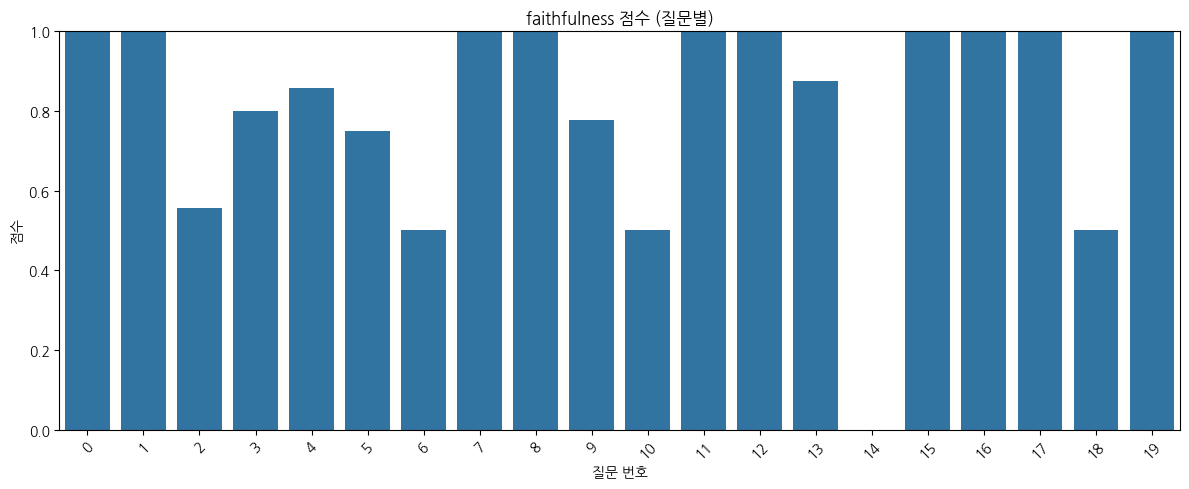

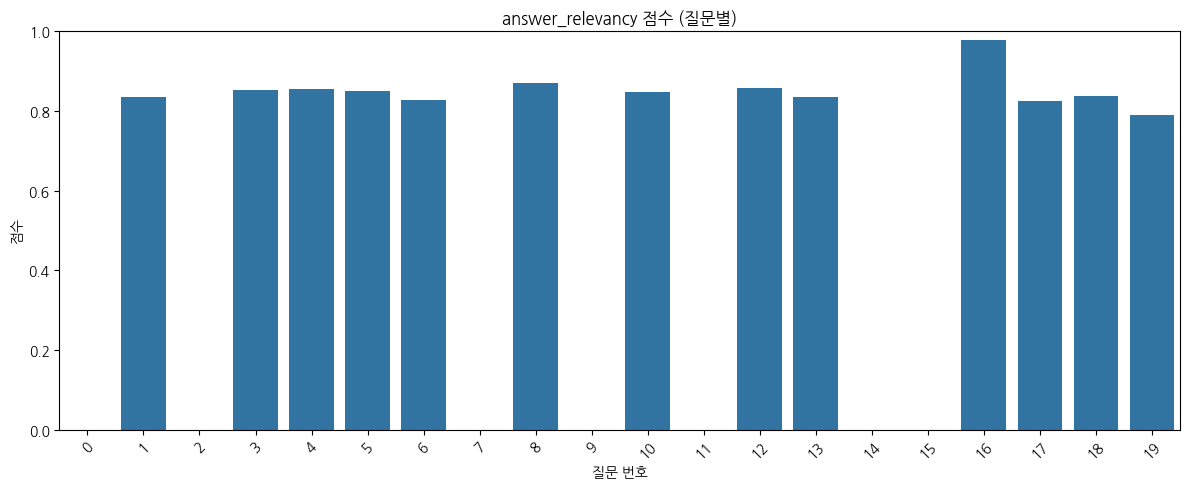

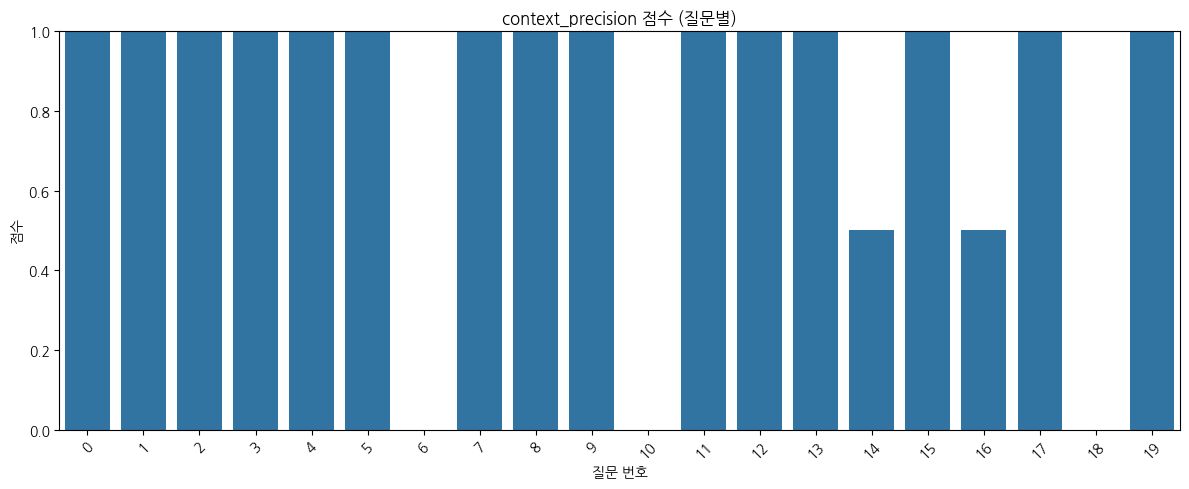

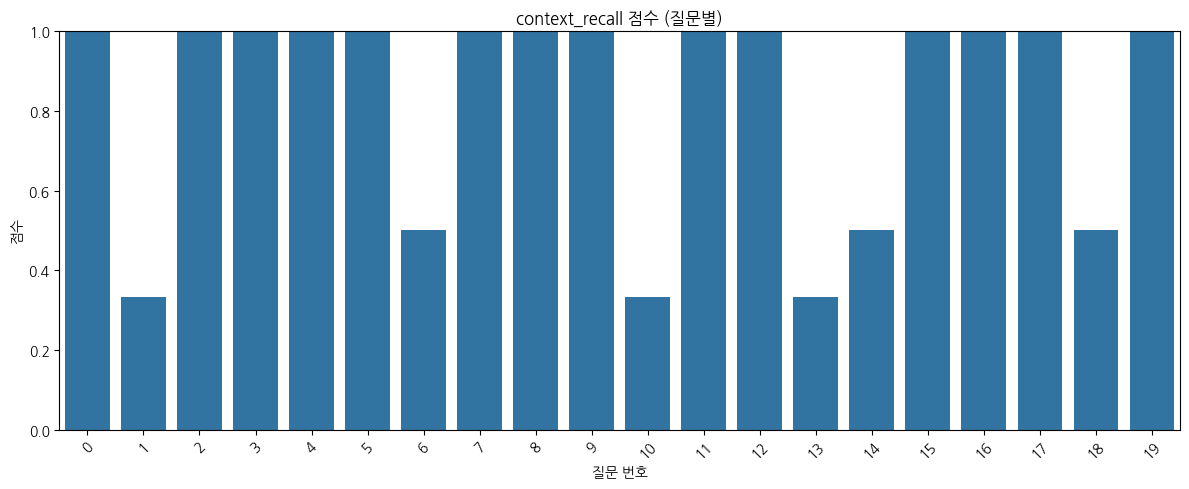

In [21]:
# ÏßàÎ¨∏Î≥Ñ ÏßÄÌëú Ï†êÏàò ÎßâÎåÄÍ∑∏ÎûòÌîÑ
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

def visualize_ragas_results(results_df):
    metric_columns = [col for col in results_df.columns if col not in ["question", "answer"]]
    
    for metric in metric_columns:
        plt.figure(figsize=(12, 5))
        sns.barplot(x=results_df.index, y=results_df[metric])
        plt.title(f"{metric} Ï†êÏàò (ÏßàÎ¨∏Î≥Ñ)")
        plt.xlabel("ÏßàÎ¨∏ Î≤àÌò∏")
        plt.ylabel("Ï†êÏàò")
        plt.ylim(0, 1)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

visualize_ragas_results(results)

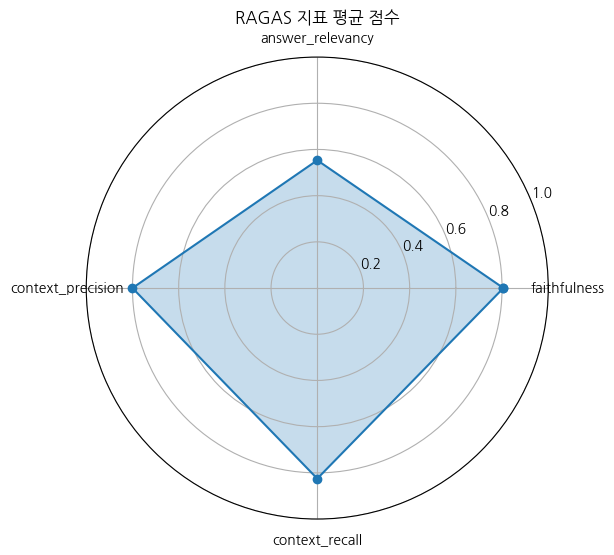

In [24]:
# Ï†ÑÏ≤¥ ÌèâÍ∑†Í∞í Î†àÏù¥Îã§ Ï∞®Ìä∏
import numpy as np
import matplotlib.pyplot as plt

def plot_radar_chart(avg_scores):
    metrics = avg_scores.index.tolist()
    scores = avg_scores.values.tolist()
    
    # Í∞Å Ï∂ïÏùò Í∞ÅÎèÑ ÏÑ§Ï†ï (Ï†êÏàòÎ•º Î®ºÏ†Ä Ïïà ÎäòÎ¶º)
    num_metrics = len(metrics)
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
    
    # ÏãúÏûëÏ†êÏúºÎ°ú ÎêòÎèåÏïÑÏò§Í∏∞ ÏúÑÌï¥ Ï≤´ Ï†ê Ï∂îÍ∞Ä (ÎßàÏßÄÎßâ Í∞í = Ï≤´ Í∞í)
    scores += scores[:1]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, scores, marker='o')
    ax.fill(angles, scores, alpha=0.25)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_title("RAGAS ÏßÄÌëú ÌèâÍ∑† Ï†êÏàò")
    plt.show()

    
plot_radar_chart(avg_scores)


### Custom Metric

In [25]:
# ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÌèâÍ∞Ä ÏßÄÌëúÎ°ú 'hallucinations_metric'ÏùÑ ÏÉùÏÑ±Ìï®
# Faithfulness Ï†êÏàòÎ•º Í∏∞Î∞òÏúºÎ°ú ÌôòÍ∞Å Ï†ïÎèÑÎ•º Í≥ÑÏÇ∞ (1 - faithfulness)

from dataclasses import dataclass, field  # Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ ÏÇ¨Ïö©ÏùÑ ÏúÑÌïú Î™®Îìà
from ragas.metrics.base import MetricWithLLM, SingleTurnMetric, MetricType  # ÌèâÍ∞Ä ÏßÄÌëúÏùò Í∏∞Î≥∏ ÌÅ¥ÎûòÏä§Îì§
from ragas.metrics import Faithfulness  # Í∏∞Ï°¥Ïùò Faithfulness Î©îÌä∏Î¶≠ ÏÇ¨Ïö©
import typing as t  # ÌÉÄÏûÖ ÌûåÌä∏Î•º ÏúÑÌïú Î™®Îìà
from ragas.callbacks import Callbacks  # ÌèâÍ∞Ä ÏßÑÌñâ Ï§ë Ïù¥Î≤§Ìä∏ ÏΩúÎ∞±
from ragas.dataset_schema import SingleTurnSample  # Îã®Ïùº ÏßàÎ¨∏-ÏùëÎãµ ÏÉòÌîå ÌòïÏãù Ï†ïÏùò

# Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ ÏÑ†Ïñ∏: ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÌèâÍ∞Ä ÏßÄÌëú HallucinationsMetric Ï†ïÏùò
@dataclass
class HallucinationsMetric(MetricWithLLM, SingleTurnMetric):
    # ÏßÄÌëú Ïù¥Î¶Ñ ÏÑ§Ï†ï
    name: str = "hallucinations_metric"

    # Ïù¥ ÏßÄÌëúÎ•º Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌï¥ ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ Ïó¥ Ï†ïÏùò (ÏÇ¨Ïö©Ïûê ÏßàÎ¨∏, ÏùëÎãµ, Í≤ÄÏÉâÎêú Î¨∏Îß•)
    _required_columns: t.Dict[MetricType, t.Set[str]] = field(
        default_factory=lambda: {
            MetricType.SINGLE_TURN: {"user_input", "response", "retrieved_contexts"}
        }
    )

    # ÌÅ¥ÎûòÏä§ Ï¥àÍ∏∞Ìôî Ïù¥ÌõÑ Ïã§ÌñâÎêòÎäî ÌõÑÏ≤òÎ¶¨ Ìï®Ïàò
    def __post_init__(self):
        # ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú Faithfulness Î©îÌä∏Î¶≠ÏùÑ Ï¥àÍ∏∞ÌôîÌïòÏó¨ ÌôúÏö©Ìï®
        self.faithfulness_metric = Faithfulness(llm=self.llm)

    # Ïã§Ï†ú Ï†êÏàòÎ•º Í≥ÑÏÇ∞ÌïòÎäî ÎπÑÎèôÍ∏∞ Ìï®Ïàò
    async def _single_turn_ascore(
        self, sample: SingleTurnSample, callbacks: Callbacks
    ) -> float:
        # Faithfulness Ï†êÏàòÎ•º Î®ºÏ†Ä Í≥ÑÏÇ∞Ìï®
        faithfulness_score = await self.faithfulness_metric.single_turn_ascore(
            sample, callbacks
        )
        # ÌôòÍ∞Å Ï†êÏàò = 1 - faithfulness Ï†êÏàò
        return 1 - faithfulness_score


In [26]:
import os  # ÌôòÍ≤ΩÎ≥ÄÏàòÏóêÏÑú API ÌÇ§ÎÇò Î™®Îç∏Î™Ö Îì±ÏùÑ Î∂àÎü¨Ïò§Í∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©

from ragas.llms import LangchainLLMWrapper  # LangChainÏùò LLMÏùÑ RAGASÏóêÏÑú ÏÇ¨Ïö© Í∞ÄÎä•ÌïòÎèÑÎ°ù Í∞êÏã∏Ï£ºÎäî ÎûòÌçº

# OpenAIÏùò Ï±ó Î™®Îç∏ÏùÑ LangChainÏóêÏÑú Î∂àÎü¨Ïò§Í∏∞
llm = ChatOpenAI(
    temperature=0,  # ÏùºÍ¥ÄÎêú Í≤∞Í≥ºÎ•º ÏúÑÌï¥ ÏÉùÏÑ± Îã§ÏñëÏÑ± ÏµúÏÜåÌôî
    model_name=os.getenv("OPENAI_DEFAULT_MODEL")  # ÌôòÍ≤ΩÎ≥ÄÏàòÏóêÏÑú Î™®Îç∏ Ïù¥Î¶Ñ Î∂àÎü¨Ïò§Í∏∞ (Ïòà: "gpt-4")
)

# RAGASÏóêÏÑú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎèÑÎ°ù LangChain LLMÏùÑ ÎûòÌïë
evaluator_llm = LangchainLLMWrapper(llm)

# ÏïûÏÑú Ï†ïÏùòÌïú ÌôòÍ∞Å ÌèâÍ∞Ä Î©îÌä∏Î¶≠Ïóê LLMÏùÑ Ïó∞Í≤∞ÌïòÏó¨ Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±
hallucinations_metric = HallucinationsMetric(llm=evaluator_llm)

In [ ]:
# Îã®Ïùº ÏßàÎ¨∏-ÏùëÎãµ ÏÉòÌîåÏùÑ ÏÉùÏÑ±ÌïòÏó¨ ÌôòÍ∞Å Ï†êÏàòÎ•º Í≥ÑÏÇ∞ÌïòÎäî ÏòàÏãú
sample = SingleTurnSample(
    user_input="ÌååÎ¶¨Îäî Ïñ¥Îäê ÎÇòÎùºÏùò ÏàòÎèÑÏù∏Í∞ÄÏöî?",
    response="ÌååÎ¶¨Îäî ÌîÑÎûëÏä§Ïùò ÏàòÎèÑÏûÖÎãàÎã§.",
    retrieved_contexts=["ÌååÎ¶¨Îäî ÌîÑÎûëÏä§Ïùò ÏàòÎèÑÏûÖÎãàÎã§. ÌîÑÎûëÏä§Îäî Ïú†ÎüΩÏóê ÏúÑÏπòÌïú Íµ≠Í∞ÄÎ°ú, ÌååÎ¶¨Îäî ÏÑ∏Í≥ÑÏ†ÅÏù∏ Î¨∏Ìôî, ÏòàÏà†, Ìå®ÏÖòÏùò Ï§ëÏã¨ÏßÄÎ°ú ÏïåÎ†§Ï†∏ ÏûàÏäµÎãàÎã§."]
)
# ÎπÑÎèôÍ∏∞ Ìï®Ïàò Ïã§Ìñâ Î∞è Í≤∞Í≥º Ï∂úÎ†•
score = await hallucinations_metric.single_turn_ascore(sample)
print("Hallucination Ï†êÏàò:", score)

Hallucination Ï†êÏàò: 0.0


In [ ]:
# Îã®Ïùº ÏßàÎ¨∏-ÏùëÎãµ ÏÉòÌîåÏùÑ ÏÉùÏÑ±ÌïòÏó¨ ÌôòÍ∞Å Ï†êÏàòÎ•º Í≥ÑÏÇ∞ÌïòÎäî ÏòàÏãú
sample = SingleTurnSample(
    user_input="ÌååÎ¶¨Îäî Ïñ¥Îäê ÎÇòÎùºÏùò ÏàòÎèÑÏù∏Í∞ÄÏöî?",
    response="ÌååÎ¶¨Îäî ÌîÑÎûëÏä§Ïùò ÏàòÎèÑÏûÖÎãàÎã§.",
    retrieved_contexts=["ÌååÎ¶¨Îäî ÎèÖÏùºÏùò ÏàòÎèÑÏûÖÎãàÎã§. ÎèÖÏùºÏùÄ Ïú†ÎüΩÏóê ÏúÑÏπòÌïú Íµ≠Í∞ÄÎ°ú, ÌååÎ¶¨Îäî ÏÑ∏Í≥ÑÏ†ÅÏù∏ Î¨∏Ìôî, ÏòàÏà†, Ìå®ÏÖòÏùò Ï§ëÏã¨ÏßÄÎ°ú ÏïåÎ†§Ï†∏ ÏûàÏäµÎãàÎã§."]
)
await hallucinations_metric.single_turn_ascore(sample)

# ÎπÑÎèôÍ∏∞ Ìï®Ïàò Ïã§Ìñâ Î∞è Í≤∞Í≥º Ï∂úÎ†•
score = await hallucinations_metric.single_turn_ascore(sample)
print("Hallucination Ï†êÏàò:", score)

Hallucination Ï†êÏàò: 1.0


In [29]:
from datasets import Dataset
import pandas as pd
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_precision,
    context_recall,
    answer_correctness
)

# RAG ÏãúÏä§ÌÖú(qa_chain)ÏúºÎ°ú ÏÉùÏÑ±Îêú ÎãµÎ≥ÄÍ≥º Í∑∏Ïóê ÎåÄÌïú ÏßàÎ¨∏¬∑Î¨∏Îß• Ï†ïÎ≥¥Î•º Í∏∞Î∞òÏúºÎ°ú RAGAS ÌèâÍ∞Ä ÏßÄÌëúÎì§(Í∏∞Î≥∏ + ÏÇ¨Ïö©Ïûê Ï†ïÏùò hallucinations)ÏùÑ Ï†ÅÏö©Ìï¥ ÏßàÎ¨∏Î≥Ñ ÌèâÍ∞Ä Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌòïÌÉúÎ°ú Î∞òÌôòÌï©ÎãàÎã§.
def evaluate_with_ragas_with_custom_metric(qa_chain, questions):
    # ÏÇ¨Ïö©Ìï† ÌèâÍ∞Ä ÏßÄÌëú ÏÑ†ÌÉù (True: ÏÇ¨Ïö© / False: ÎØ∏ÏÇ¨Ïö©)
    use_faithfulness = True
    use_answer_relevancy = True
    use_context_precision = True
    use_context_recall = True    
    use_answer_correctness = False
    use_hallucinations = True  # ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÌôòÍ∞Å ÌèâÍ∞Ä Ï∂îÍ∞Ä Ïó¨Î∂Ä

    # ÌèâÍ∞ÄÏö© Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ Ï¥àÍ∏∞Ìôî
    evaluation_data = {
        "question": [],   # ÏßàÎ¨∏
        "answer": [],     # ÏÉùÏÑ±Îêú ÎãµÎ≥Ä
        "contexts": []    # Í≤ÄÏÉâÎêú Î¨∏ÏÑú Ï°∞Í∞Å (Î≥µÏàò)
    }

    # context_precision / recallÏùÑ ÏúÑÌïú reference Ïª¨Îüº Ï∂îÍ∞Ä
    if use_context_precision or use_context_recall:
        evaluation_data["reference"] = []

    # Í∞Å ÏßàÎ¨∏Ïóê ÎåÄÌï¥ RAG QA Ï≤¥Ïù∏ Ïã§Ìñâ
    for question in questions:
        result = qa_chain(question)  # RAG ÏãúÏä§ÌÖúÏóêÏÑú ÎãµÎ≥Ä ÏÉùÏÑ±
        answer = result["result"]
        contexts = [doc.page_content for doc in result["source_documents"]]

        # ÌèâÍ∞ÄÏö© Îç∞Ïù¥ÌÑ∞ ÎàÑÏ†Å
        evaluation_data["question"].append(question)
        evaluation_data["answer"].append(answer)
        evaluation_data["contexts"].append(contexts)

        # reference Î¨∏ÏÑú (Î≥¥ÌÜµ Ï≤´ Î≤àÏß∏ context) Ï∂îÍ∞Ä
        if use_context_precision or use_context_recall:
            evaluation_data["reference"].append(contexts[0] if contexts else "")

    # ÌèâÍ∞ÄÎ•º ÏúÑÌïú huggingface Dataset Í∞ùÏ≤¥ ÏÉùÏÑ±
    eval_dataset = Dataset.from_dict(evaluation_data)

    # ÏÇ¨Ïö©Ìï† Î©îÌä∏Î¶≠ Î¶¨Ïä§Ìä∏ Íµ¨ÏÑ±
    metrics = []
    if use_faithfulness:
        metrics.append(faithfulness)
    if use_answer_relevancy:
        metrics.append(answer_relevancy)
    if use_context_precision:
        metrics.append(context_precision)
    if use_context_recall:
        metrics.append(context_recall)
    if use_answer_correctness:
        metrics.append(answer_correctness)
    if use_hallucinations:
        # ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÌôòÍ∞Å ÌèâÍ∞Ä Î©îÌä∏Î¶≠ Ï∂îÍ∞Ä
        hallucinations_metric = HallucinationsMetric(llm=evaluator_llm)
        metrics.append(hallucinations_metric)

    # RAGAS ÌèâÍ∞Ä Ïã§Ìñâ
    results = evaluate(
        eval_dataset,
        metrics=metrics
    )

    # Í≤∞Í≥ºÎ•º DataFrame ÌòïÌÉúÎ°ú Ï†ïÎ¶¨
    results_df = pd.DataFrame({
        "question": evaluation_data["question"],
        "answer": evaluation_data["answer"]
    })

    # Í∞Å Î©îÌä∏Î¶≠ Í≤∞Í≥º Ïª¨ÎüºÏóê Ï∂îÍ∞Ä
    for metric in metrics:
        results_df[metric.name] = results[metric.name]

    return results_df  # ÌèâÍ∞Ä Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î∞òÌôò


In [30]:
results = evaluate_with_ragas_with_custom_metric(qa_chain, questions)

Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [01:23<00:00,  1.19it/s]


In [33]:
print("ÌèâÍ∞Ä Í≤∞Í≥º:")
print(results)

metric_columns = [col for col in results.columns if col not in ["question", "answer"]]
if metric_columns:
    avg_scores = results[metric_columns].mean()
    print("\nÌèâÍ∑† Ï†êÏàò:")
    print(avg_scores)


ÌèâÍ∞Ä Í≤∞Í≥º:
                                             question  \
0   ÏãúÍ∞ÄÏ¥ùÏï° ÏÉÅÏúÑ Î∞îÏù¥Ïò§ÌÖçÏùò ÌòÑÏû¨ ÏãúÏû• ÏÉÅÌô©ÏùÄ Ïñ¥Îñ§ ÏòÅÌñ•ÏùÑ Î∞õÍ≥† ÏûàÏúºÎ©∞, Ìñ•ÌõÑ Ï†ÑÎßùÏùÄ ...   
1       Íµ≠ÎÇ¥ Ï†úÏïΩ/Î∞îÏù¥Ïò§ ÏóÖÏ≤¥Îì§Ïùò Í∏∞Ïà† Ïù¥Ï†Ñ Í±¥ ÏàòÏôÄ Í∏àÏï° Ï∂îÏù¥Îäî Ïñ¥Îñ§ Î≥ÄÌôîÎ•º Î≥¥ÏòÄÎÇòÏöî?   
2   2025ÎÖÑÍπåÏßÄÏùò Íµ≠ÎÇ¥ Ï†úÏïΩ/Î∞îÏù¥Ïò§ ÏóÖÏ≤¥Îì§Ïùò Ï£ºÏöî Í∏∞Ïà† Ïù¥Ï†Ñ ÎÇ¥Ïó≠ÏùÄ Ïñ¥ÎñªÍ≤å Î≥ÄÌôîÌïòÍ≥† ...   
3   ÎãπÏÇ¨Îäî 7Ïõî 15Ïùº ÌòÑÏû¨ Ïñ¥Îñ§ Ï¢ÖÎ™©ÏùÑ 1% Ïù¥ÏÉÅ Î≥¥Ïú†ÌïòÍ≥† ÏûàÏßÄ ÏïäÎã§Í≥† Î∞ùÌòîÎäîÎç∞, Ïù¥...   
4   ÌòÑÏû¨ ÏΩîÏä§Îã• ÏãúÍ∞ÄÏ¥ùÏï° ÏÉÅÏúÑ Î∞îÏù¥Ïò§ÌÖçÏùò Ï£ºÍ∞Ä ÏÉÅÏäπÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Ï£ºÏöî ÏöîÏù∏ÏùÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî?   
5   Íµ≠ÎÇ¥ Ï†úÏïΩ/Î∞îÏù¥Ïò§ ÏóÖÏ≤¥Îì§Ïùò Í∏∞Ïà† Ïù¥Ï†Ñ Í±¥ ÏàòÏôÄ Í∏àÏï° Ï∂îÏù¥Ïóê ÎåÄÌïú ÏµúÍ∑º ÎèôÌñ•ÏùÄ Ïñ¥Îñ†ÌïúÍ∞ÄÏöî?   
6   2025ÎÖÑÍπåÏßÄ Íµ≠ÎÇ¥ Ï†úÏïΩ/Î∞îÏù¥Ïò§ ÏóÖÏ≤¥Îì§Ïùò Í∏∞Ïà† Ïù¥Ï†Ñ ÎÇ¥Ïó≠ÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ Ï¥ùÍ∏àÏï°ÏùÑ Í∏∞...   
7   ÎãπÏÇ¨Îäî 7Ïõî 15Ïùº ÌòÑÏû¨ ÏÉÅÍ∏∞ Ïñ∏Í∏âÎêú Ï¢ÖÎ™©ÏùÑ 1% Ïù¥ÏÉÅ Î≥¥Ïú†